Shape: (391137, 6)
       datasetId       HR            RMSSD          LF_HF         sampen    
count  391137.0   391137.000000  391137.000000  391137.000000  391137.000000
mean        2.0       73.766381      15.008265      80.667409       2.084412
std         0.0        9.521565       4.105702     138.890359       0.146645
min         2.0       48.736986       5.529742       2.319952       1.441465
25%         2.0       66.939679      11.892431      14.846021       2.044585
50%         2.0       74.186222      14.416092      29.027570       2.137263
75%         2.0       80.022265      17.917303      78.568769       2.182363
max         2.0      104.944748      26.629477    1200.687613       2.234841

Conditions: condition
no stress        212425
interruption     112713
time pressure     65999
Name: count, dtype: int64


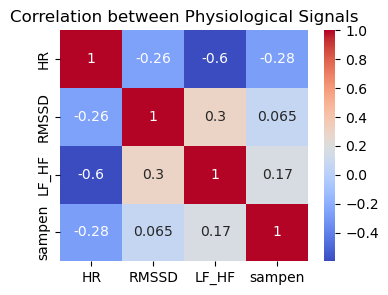

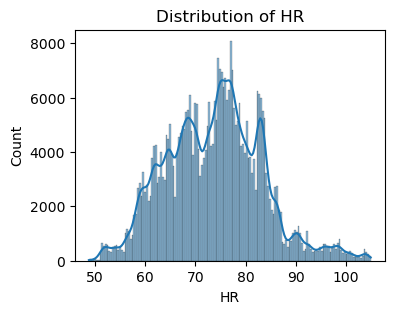

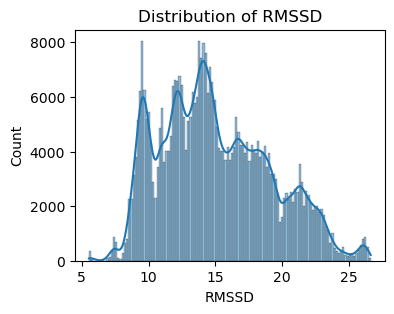

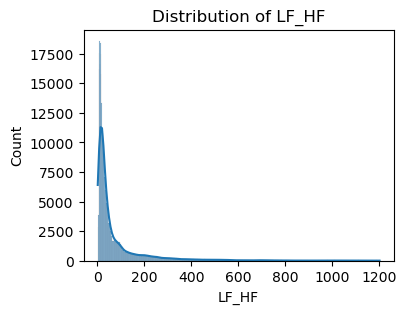

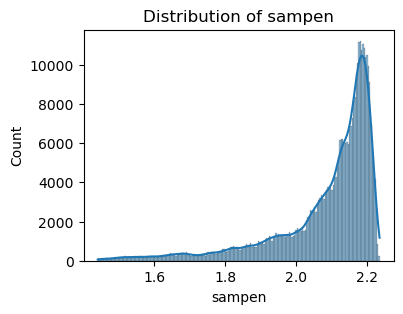

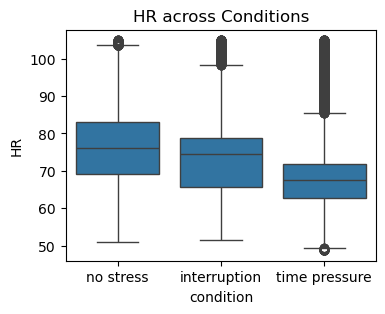

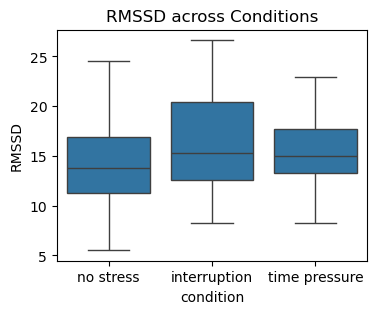

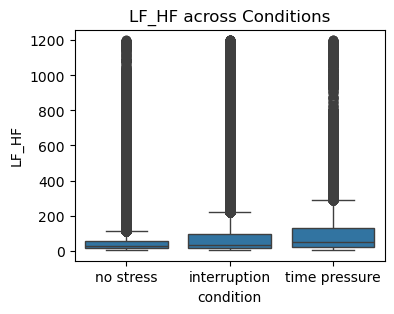

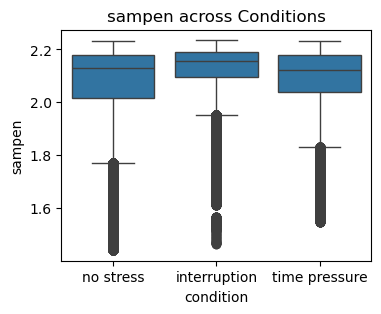


Descriptive Statistics per Condition:



HR                            RMSSD                         LF_HF                             sampen                     
                mean   std     min     max      mean   std    min     max     mean     std     min      max     mean   std    min    max  
condition                                                                                                                                 
interruption   72.504  8.599  51.363  104.944  16.277  4.760  8.278  26.629   98.048  165.582  2.943  1200.688  2.117  0.116  1.466  2.235
no stress      76.401  9.373  50.975  104.944  14.256  3.819  5.530  24.551   62.649  114.911  2.320  1199.543  2.068  0.161  1.441  2.232
time pressure  67.441  7.948  48.737  104.945  15.262  3.104  8.224  22.920  108.980  150.461  4.739  1200.166  2.082  0.134  1.548  2.233

Descriptive statistics saved at ../outputs/descriptive_stats.csv


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

#Load cleaned data
df = pd.read_csv("../outputs/cleaned_data.csv")

#Basic info
print("Shape:", df.shape)
print(df.describe())
print("\nConditions:", df['condition'].value_counts())

#Correlation heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(df[['HR','RMSSD','LF_HF','sampen']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Physiological Signals")
plt.show()

#Distribution plots
for col in ['HR','RMSSD','LF_HF','sampen']:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

#Boxplots per condition
for col in ['HR','RMSSD','LF_HF','sampen']:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x='condition', y=col, data=df)
    plt.title(f"{col} across Conditions")
    plt.show()

#Compute per-condition descriptive stats
desc_stats = df.groupby('condition')[['HR','RMSSD','LF_HF','sampen']].agg(['mean','std','min','max'])
print("\nDescriptive Statistics per Condition:\n")
pd.set_option('display.max_columns', None)      
pd.set_option('display.width', 200) 
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.expand_frame_repr', False)
display(desc_stats.round(3))

#print(desc_stats)

#Save descriptive stats
os.makedirs("../outputs", exist_ok=True)
desc_stats.to_csv("../outputs/descriptive_stats.csv")
print("Descriptive statistics saved at ../outputs/descriptive_stats.csv")
